# End to End Real Time Predictive model

## Business Use-Case

Prediction of power output for real time data for given a set of environmental readings from various sensors in a natural gas-fired power generation plant.

### Getting Started with

Design and develop an optimized predictive Linear Regression model.

Train and test using historical data

Performance tuning and optimize model.

Report the accuracy of model using confusion matrix, MSE, ROC curve and AUC etc.

Save and persist the model by serializing. 

Conversion of serialized model to PMML format.

Prediction of power output for real time data. 

### Step 1: Design and develop an optimized predictive Linear Regression model.

Note: inspired and Adapted from "http://datascience-enthusiast.com"

#### Non-Regularized Multivariate Linear Regression. 

Prediction of power output given a set of environmental readings from various sensors in a natural gas-fired power generation plant.
Using the <b>Scikit-learn library</b> in Python and perform <b>Exploratory Data Analysis (EDA)</b> on a real-world dataset, and then apply <b>non-regularized linear regression</b> to solve a <b>supervised regression</b> problem on the dataset.
The task is a regression problem since the label (or target) we are trying to predict is numeric.

#### Setting up Python ecosystem environment for data analysis.

Technology stack for model development.

Python 3 from Anaconda.

    Numpy
    Scipy
    Pandas
    Matplotlib
    Statsmodel
    Seaborn

In [23]:
# Importing packages

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### Power Plant Dataset

The real-world data power plant consists of 9,568 data points, each with 4 environmental attributes collected from a <b>Combined Cycle Power Plant</b> over 6 years (2006-2011), and is provided by <b>the University of California, Irvine at UCI Machine Learning Repository Combined Cycle Power Plant Data Set.</b>


#### Download power plant data, CCPP.zip 

In [24]:
# Download power plant data, CCPP.zip and unzip

#from StringIO import StringIO
import requests
from io import StringIO
from zipfile import ZipFile

from urllib.request import urlopen
import zipfile, urllib.request, shutil

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip'
file_name = 'CCPP.zip'

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()

### Two ways to load the extrcted data to dataframe.
#### 1. Convert Folds5x2_pp.xlsx to ccpp.csv and then load

In [25]:
powerdata = pd.read_csv('/home/gopinathankm/work/workspace/machine-learning/linear-regression/CCPP/ccpp.csv', index_col=False, header=0)
print(powerdata.head(5))

      AT      V       AP     RH      PE
0   8.34  40.77  1010.84  90.01  480.48
1  23.64  58.49  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43


#### 2. Directly read the xlsx file using xlrd package.

In [26]:
import xlrd
power_plant = pd.read_excel("/home/gopinathankm/work/workspace/machine-learning/linear-regression/CCPP/Folds5x2_pp.xlsx")
power_plant.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### Show the number of rows and columns in power-plant dataset

In [27]:
print(power_plant.shape)

(9568, 5)


#### Exploratory Data Analysis (EDA)

This is a step that we should always perform before trying to fit a model to the data, as this step will often lead to important insights about our data.


In [28]:
type(power_plant)

pandas.core.frame.DataFrame

In [29]:
# See first few rows
power_plant.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [30]:
# Size of  DataFrame
power_plant.shape   # we have 9568 rows and 5 columns

(9568, 5)

In [31]:
# class of each column in the DataFrame
power_plant.dtypes    # all columns are numeric

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [32]:
# Are there any missing values in any of the columns?
power_plant.info()  # There is no missing data in all of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


<b>The columns in the DataFrame are:</b>

AT = Atmospheric Temperature in C

V = Exhaust Vacuum Speed

AP = Atmospheric Pressure

RH = Relative Humidity

PE = Power Output

Power Output is the value we are trying to predict given the measurements above.

In [33]:
print(power_plant.describe())

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


#### Visualize relationship between variables

Before we perform any modeling, it is a good idea to explore correlations between the predictors and the predictand. This step can be important as it helps us to select appropriate models. If our features and the outcome are linearly related, we may start with linear regression models. However, if the relationships between the label and the features are non-linear, non-linear ensemble models such as random forest can be better.

#### Correlation between power output and temperature

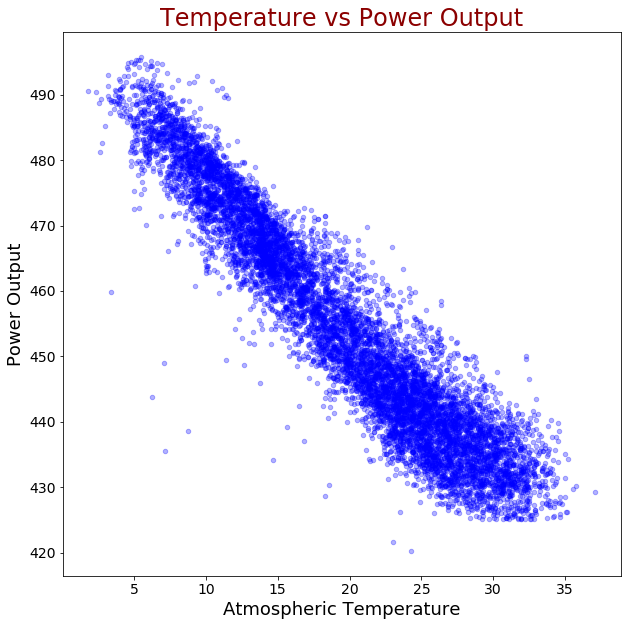

In [34]:
# Correlation between power output and temperature
power_plant.plot(x ='AT', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3, 
                fontsize = 14)
plt.title("Temperature vs Power Output", 
          fontsize = 24, color="darkred")
plt.xlabel("Atmospheric Temperature", fontsize = 18) 
plt.ylabel("Power Output", fontsize = 18)
plt.show()

As shown in the above figure, there is strong linear correlation between Atmospheric Temperature and Power Output.

#### Correlation between Exhaust Vacuum Speed and power output

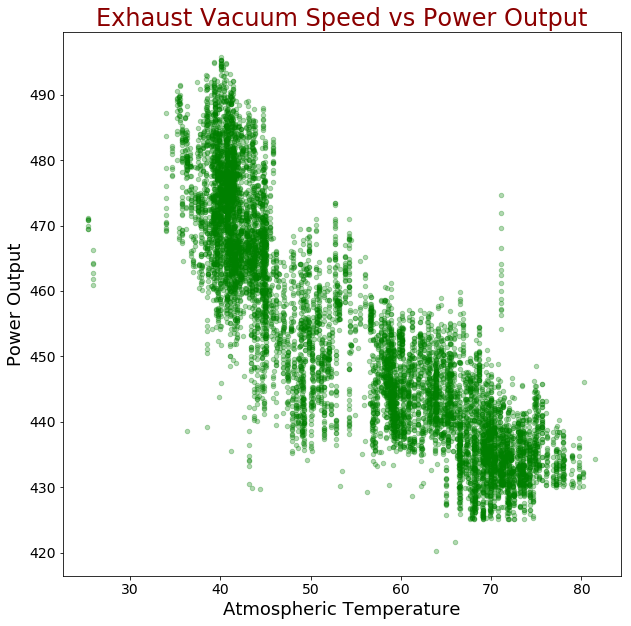

In [35]:
####  Correlation between Exhaust Vacuum Speed and power output 

power_plant.plot(x ='V', y = 'PE',kind ="scatter", 
                 figsize = [10,10],
                 color ="g", alpha = 0.3, 
                fontsize = 14)

plt.title("Exhaust Vacuum Speed vs Power Output", fontsize = 24, color="darkred")

plt.xlabel("Atmospheric Temperature", fontsize = 18) 

plt.ylabel("Power Output", fontsize = 18)

plt.show()

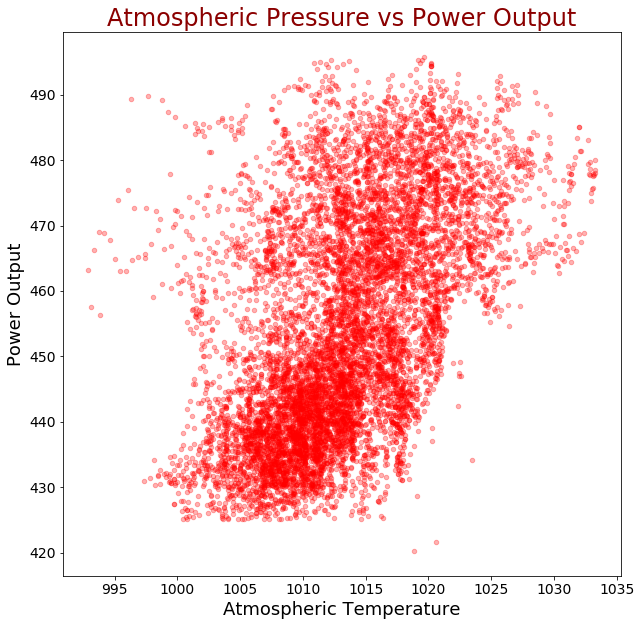

In [36]:
power_plant.plot(x ='AP', y = 'PE',kind ="scatter", 
                 figsize = [10,10],
                 color ="r", alpha = 0.3,
                fontsize = 14)

plt.title("Atmospheric Pressure vs Power Output", fontsize = 24, color="darkred")
plt.xlabel("Atmospheric Temperature", fontsize = 18) 
plt.ylabel("Power Output", fontsize = 18)
plt.show()

#### Correlation between relative humidity

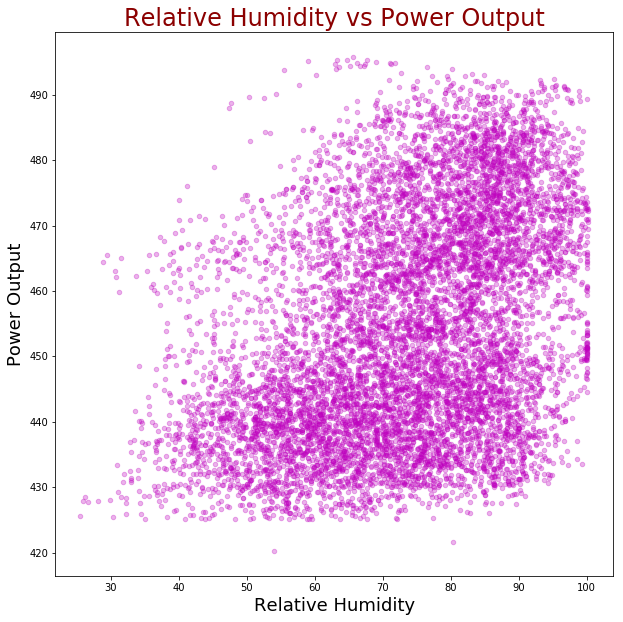

In [37]:
# Correlation between relative humidity 
# and power output 

power_plant.plot(x ='RH', y = 'PE',kind ="scatter", 
                 figsize = [10,10],
                 color ="m", alpha = 0.3)
plt.title("Relative Humidity vs Power Output", fontsize = 24, color="darkred")
plt.xlabel("Relative Humidity", fontsize = 18) 
plt.ylabel("Power Output", fontsize = 18)
plt.show()  

#### Correlation heatmap

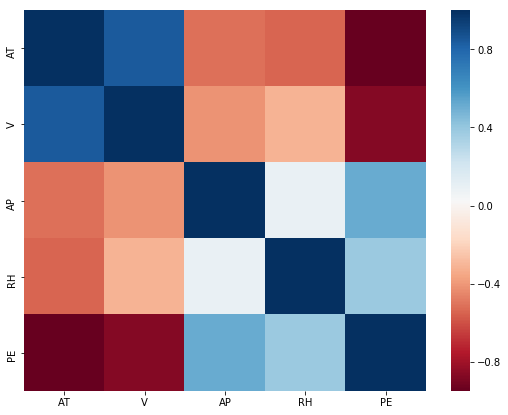

In [38]:
# correlation heatmap 
corr = power_plant.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(corr, cmap="RdBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

As shown in the correlation heatmap above, the target is correlated with the features. However, we also observe correlation among the features, hence we have multi-collinearity problem and will use regularization to check if the collinearity we observe has a significant impact on the performance of linear regression model.

#### Data Modeling

All the columns are numeric and there are no missing values, which makes our modeling task strightforward.

Now, let's model our data to predict what the power output will be given a set of sensor readings. Our first model will be based on simple linear regression since we saw some linear patterns in our data based on the scatter plots and correlation heatmap during the exploration stage.

We need a way of evaluating how well our linear regression model predicts power output as a function of input parameters. We can do this by splitting up our initial data set into a Training Set, used to train our model and a Test Set, used to evaluate the model's performance in giving predictions.


#### For predictive modeling we use Scikit-learn package
Import packages

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

#### Split data into training and test datasets

Let's split the original dataset into training and test datasets. The training dataset is 80% of the whole dataset, the test set is the remaining 20% of the original dataset. In Python, we use the train_test_split function to acheieve that.


In [40]:
X = power_plant.drop("PE", axis = 1).values
y = power_plant['PE'].values
y = y.reshape(-1, 1)

# Split into training and test set
# 80% of the input for training and 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size = 0.2, 
                                               random_state=42)

Training_to_original_ratio = round(X_train.shape[0]/(power_plant.shape[0]), 2) * 100

Testing_to_original_ratio = round(X_test.shape[0]/(power_plant.shape[0]), 2) * 100

print ('As shown below {}% of the data is for training and the rest {}% is for testing.'.format(Training_to_original_ratio, 
                                                                                               Testing_to_original_ratio))
list(zip(["Training set", "Testing set"],
   [Training_to_original_ratio, Testing_to_original_ratio]))

As shown below 80.0% of the data is for training and the rest 20.0% is for testing.


[('Training set', 80.0), ('Testing set', 20.0)]

#### Linear Regression

In [41]:
# Instantiate linear regression: reg
# Standardize features by removing the mean and scaling to unit variance using the StandardScaler() function.
# Apply Scaling to X_train and X_test

std_scale = StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

linear_reg = LinearRegression()
reg_scaled = linear_reg.fit(X_train_scaled, y_train)
y_train_scaled_fit = reg_scaled.predict(X_train_scaled)

print("R-squared for training dataset:{}".
      format(np.round(reg_scaled.score(X_train_scaled, y_train),
                      2)))

print("Root mean square error: {}".
      format(np.round(np.sqrt(mean_squared_error(y_train, 
                                        y_train_scaled_fit)), 2)))

coefficients = reg_scaled.coef_
features = list(power_plant.drop("PE", axis = 1).columns)

print(" ")
print('The coefficients of the features from the linear model:')
print(dict(zip(features, coefficients[0])))

print("")

print("The intercept is {}".format(np.round(reg_scaled.intercept_[0],3)))

R-squared for training dataset:0.93
Root mean square error: 4.57
 
The coefficients of the features from the linear model:
{'AT': -14.763927385645411, 'V': -2.9496320985616302, 'AP': 0.36978031656086752, 'RH': -2.3121956560685835}

The intercept is 454.431


#### Prediction

R-squared for test dataset:0.93
Root mean square error for test dataset: 4.5
Actual ouput:.......................
[[ 455.27]
 [ 436.31]
 [ 440.68]
 ..., 
 [ 479.53]
 [ 435.76]
 [ 457.1 ]]
Predicted ouput:.......................
[[ 455.68020791]
 [ 438.73212215]
 [ 434.16444   ]
 ..., 
 [ 482.16817365]
 [ 435.41524413]
 [ 458.76150613]]


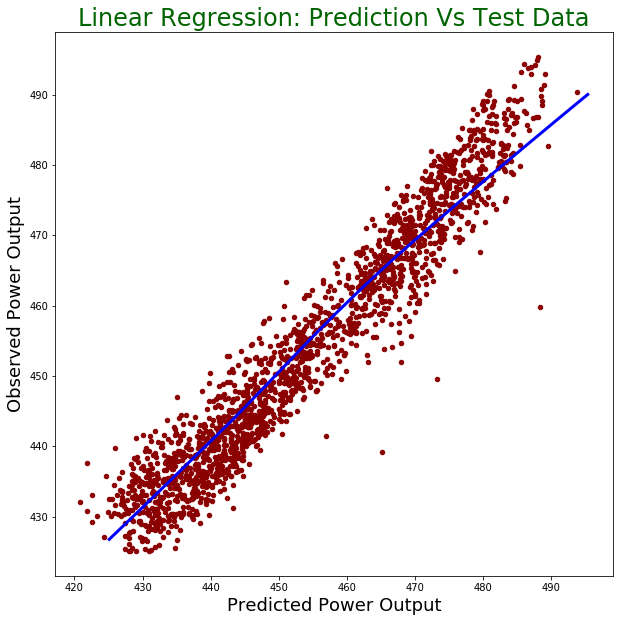

In [44]:
# Predict using the test data

pred = reg_scaled.predict(X_test_scaled)

print("R-squared for test dataset:{}".
      format(np.round(reg_scaled.score(X_test_scaled, 
                                       y_test),  2)))

print("Root mean square error for test dataset: {}".
      format(np.round(np.sqrt(mean_squared_error(y_test, 
                                        pred)), 2)))

data =  {"prediction": pred, "observed": y_test}

test = pd.DataFrame(pred, columns = ["Prediction"])

test["Observed"] = y_test

lowess = sm.nonparametric.lowess

z = lowess(pred.flatten(), y_test.flatten())


print("Actual ouput:.......................")
print(y_test)
print("Predicted ouput:.......................")
print(pred)

test.plot(figsize = [10,10],
          x ="Prediction", y = "Observed", kind = "scatter", color = 'darkred')

plt.title("Linear Regression: Prediction Vs Test Data", fontsize = 24, color = "darkgreen")

plt.xlabel("Predicted Power Output", fontsize = 18) 

plt.ylabel("Observed Power Output", fontsize = 18)

plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)

plt.show()

### Step 2. Save and persist the model by serializing.

#### Following packages needs to be installed and updated in conda.

Prerequisites
The Python side of operations

    Python 2.7, 3.4 or newer.
    scikit-learn 0.16.0 or newer.
    sklearn-pandas 0.0.10 or newer.
    sklearn2pmml 0.14.0 or newer.

$ pip install sklearn-pmml

$ pip install sklearn-pandas

$ pip install sklearn2pmml

#####  Confirm all packages are installed and updated in conda

$ conda list

scikit-image              0.13.0           py36had3c07a_1  
scikit-learn              0.19.1           py36h7aa7ec6_0  
scipy                     0.19.1           py36h9976243_3  
seaborn                   0.8.0            py36h197244f_0  
setuptools                36.5.0           py36he42e2e1_0  
Shapely                   1.6.2.post1               <pip>
simplegeneric             0.8.1            py36h2cb9092_0  
sip                       4.18.1           py36h51ed4ed_2  
six                       1.11.0           py36h372c433_1  
sklearn-pandas            1.6.0                     <pip>
sklearn-pmml              0.1.2                     <pip>
sklearn2pmml              0.26.0                    <pip>
snowballstemmer           1.2.1            py36h6febd40_0  
sortedcontainers          1.5.7            py36hdf89491_0  
sphinx                    1.6.3            py36he5f0bdb_0  
sphinxcontrib             1.0              py36h6d0f590_1  
sphinxcontrib-websupport  1.0.1            py36hb5cb234_1  
spyder                    3.2.4            py36hbe6152b_0  
sqlite                    3.20.1               h6d8b0f3_1  
statsmodels               0.8.0            py36h8533d0b

#### Separate complete python code, ccppOpencore.py

####  File: ccppOpencore.py    

#### Serialization
from sklearn_pandas import DataFrameMapper

from sklearn.preprocessing import StandardScaler

from sklearn2pmml.decoration import ContinuousDomain

ccpp_mapper = DataFrameMapper([
    (["AT", "V", "AP", "RH"], [ContinuousDomain(), StandardScaler()])
])

from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest

ccpp_pca = PCA(n_components = 3)

ccpp_selector = SelectKBest(k = 2)


from sklearn.model_selection import cross_val_predict

from sklearn import linear_model

from sklearn.pipeline import make_pipeline

ccpp_classifier = linear_model.LinearRegression()

from sklearn2pmml import PMMLPipeline

ccpp_pipeline = PMMLPipeline([
    ("mapper", ccpp_mapper),
    ("pca", ccpp_pca),
    ("selector", ccpp_selector),
    ("estimator", ccpp_classifier)
])

ccpp_pipeline.fit(power_plant, power_plant["PE"])

from sklearn.externals import joblib

joblib.dump(ccpp_pipeline, "ccpp.pkl.z", compress = 9)

<b>Run above python program</b>

Check the generated <b>ccpp.pkl.z</b>

drwxrwxr-x  2 gopinathankm gopinathankm   4096 Oct  1 12:49 inputs

drwxrwxr-x  2 gopinathankm gopinathankm   4096 Nov  4 14:26 images

drwxrwxr-x  3 gopinathankm gopinathankm   4096 Nov 16 21:26 fraud-detection

drwxrwxr-x  2 gopinathankm gopinathankm   4096 Nov 18 13:55 data

-rw-rw-r--  1 gopinathankm gopinathankm 175758 Nov 19 07:07 CCPP-results.csv

-rw-rw-r--  1 gopinathankm gopinathankm   2441 Nov 19 06:30 <b>ccpp.pkl.z</b>

-rw-rw-r--  1 gopinathankm gopinathankm   8061 Nov 19 06:30 ccppOpencore.py

-rw-rw-r--  1 gopinathankm gopinathankm   1114 Nov 19 09:06 ccfraudOpencoring.py

-rw-rw-r--  1 gopinathankm gopinathankm    695 Nov 19 07:07 cccpOpenscore2.py

### Step 3. Conversion of serialized model to PMML format.

<b>JPMML-SkLearn</b>

https://github.com/jpmml/jpmml-sklearn

Java library and command-line application for converting Scikit-Learn models to PMML.

Download or clone JPMML-Sklearn.

Unzip and cd to jpmml-sklearn-master to /home/gopinathankm

$ <b>mvn clean install</b>

(my_env36) gopinathankm@gopinathankm-Lenovo-G400 ~/jpmml-sklearn-master/target/
total 5584

drwxrwxr-x 10 gopinathankm gopinathankm    4096 Nov 17 20:26 test-classes

drwxrwxr-x  2 gopinathankm gopinathankm    4096 Nov 17 20:27 surefire-reports

drwxrwxr-x  3 gopinathankm gopinathankm    4096 Nov 17 20:27 site

drwxrwxr-x  3 gopinathankm gopinathankm    4096 Nov 17 20:26 maven-status

drwxrwxr-x  2 gopinathankm gopinathankm    4096 Nov 17 20:27 maven-archiver

-rw-rw-r--  1 gopinathankm gopinathankm  219958 Nov 17 20:27 jpmml-sklearn-1.4-SNAPSHOT-sources.jar

-rw-rw-r--  1 gopinathankm gopinathankm  293748 Nov 17 20:27 jpmml-sklearn-1.4-SNAPSHOT.jar

-rw-rw-r--  1 gopinathankm gopinathankm   73416 Nov 17 20:27 jacoco.exec

drwxrwxr-x  3 gopinathankm gopinathankm    4096 Nov 17 20:26 generated-test-sources

drwxrwxr-x  4 gopinathankm gopinathankm    4096 Nov 17 20:26 generated-sources

-rw-rw-r--  1 gopinathankm gopinathankm 5094225 Nov 17 20:27 converter-executable-1.4-SNAPSHOT.jar

drwxrwxr-x 14 gopinathankm gopinathankm    4096 Nov 17 20:26 classes

(my_env36) gopinathankm@gopinathankm-Lenovo-G400 ~/jpmml-sklearn-master/target $ 

<b>Converting the pipeline pickle file ccpp.pkl.z to a PMML file pipeline.pmml</b>

$<b>java -jar target/converter-executable-1.4-SNAPSHOT.jar --pkl-input /home/gopinathankm/work/workspace/machine-learning/ccpp.pkl.z --pmml-output ccpp.pmml</b>

<b>Check the generated pmml file:</b>

(my_env36) gopinathankm@gopinathankm-Lenovo-G400 ~/jpmml-sklearn-master $ ls -lr
total 212

drwxrwxr-x 10 gopinathankm gopinathankm   4096 Nov 17 20:27 target

drwxrwxr-x  4 gopinathankm gopinathankm   4096 Oct 18 14:45 src

-rw-rw-r--  1 gopinathankm gopinathankm  14838 Oct 18 14:45 README.md

-rw-rw-r--  1 gopinathankm gopinathankm   7163 Oct 18 14:45 pom.xml

-rw-rw-r--  1 gopinathankm gopinathankm  12946 Oct 18 14:45 NOTICE.txt

-rw-rw-r--  1 gopinathankm gopinathankm  34520 Oct 18 14:45 LICENSE.txt

-rw-rw-r--  1 gopinathankm gopinathankm   6422 Nov 19 06:37 ccpp.pmml








### Prediction of power output for real time data.

#### Openscoring-Python

Download & Installation of Openscoring-Python

Installing the latest version from GitHub:

pip install --user --upgrade git+https://github.com/jpmml/openscoring-python.git

cd openscoring-master$ mvn clean install

[INFO] ------------------------------------------------------------------------

[INFO] Reactor Summary:

[INFO]

[INFO] Openscoring ........................................ SUCCESS [ 30.626 s]

[INFO] Openscoring Common ................................. SUCCESS [01:16 min]

[INFO] Openscoring Client ................................. SUCCESS [ 32.883 s]

[INFO] Openscoring Common GWT ............................. SUCCESS [03:29 min]

[INFO] Openscoring Service ................................ SUCCESS [02:23 min]

[INFO] Openscoring Server ................................. SUCCESS [ 19.813 s]

[INFO] Openscoring WebApp ................................. SUCCESS [ 12.602 s]

[INFO] ------------------------------------------------------------------------

[INFO] BUILD SUCCESS

[INFO] ------------------------------------------------------------------------

[INFO] Total time: 08:46 min

[INFO] Finished at: 2017-11-17T23:05:56+05:30

[INFO] Final Memory: 48M/331M

[INFO] ------------------------------------------------------------------------

g(my_env36) gopinathankm@gopinathankm-Lenovo-G400 ~/openscoring-master $ ls -lr

total 144
-rw-rw-r-- 1 gopinathankm gopinathankm 19202 Aug 20 13:29 README.md

-rw-rw-r-- 1 gopinathankm gopinathankm  9123 Aug 20 13:29 pom.xml

drwxrwxr-x 4 gopinathankm gopinathankm  4096 Nov 17 23:05 openscoring-webapp

drwxrwxr-x 4 gopinathankm gopinathankm  4096 Nov 17 23:05 openscoring-service

drwxrwxr-x 4 gopinathankm gopinathankm  4096 Nov 17 23:05 openscoring-server

drwxrwxr-x 4 gopinathankm gopinathankm  4096 Nov 17 23:02 openscoring-common-gwt

drwxrwxr-x 4 gopinathankm gopinathankm  4096 Nov 17 22:58 openscoring-common

drwxrwxr-x 4 gopinathankm gopinathankm  4096 Nov 17 22:59 openscoring-client

-rw-rw-r-- 1 gopinathankm gopinathankm 50080 Aug 20 13:29 NOTICE.txt

-rw-rw-r-- 1 gopinathankm gopinathankm 34520 Aug 20 13:29 LICENSE.txt

#### Start the Openscoring server

gopinathankm@gopinathankm-Lenovo-G400 ~/openscoring-master/openscoring-server $ <b>java -jar target/server-executable-1.3-SNAPSHOT.jar</b>

Nov 17, 2017 11:08:10 PM org.eclipse.jetty.util.log.Log initialized

INFO: Logging initialized @179ms

Nov 17, 2017 11:08:10 PM org.openscoring.service.NetworkSecurityContextFilter discoverLocalAddresses

INFO: Local network addresses: [127.0.1.1, 127.0.0.1]

Nov 17, 2017 11:08:10 PM org.eclipse.jetty.server.Server doStart



#### Openscore the real time data by running following python client program for Openscoring server

####  cccpOpenscore2.py
import openscoring
import os

os = openscoring.Openscoring("http://localhost:8080/openscoring")
kwargs = {"auth" : ("admin", "adminadmin")}
os.deploy("CCPP", "/home/gopinathankm/jpmml-sklearn-master/ccpp.pmml", **kwargs)

arguments = {"AT" :9.2, "V" : 39.82, "AP" : 1013.19, "RH" : 91.25}

result = os.evaluate("CCPP", arguments)
print(result)

evaluationRequest = openscoring.EvaluationRequest("record-001", arguments)
evaluationResponse = os.evaluate("CCPP", evaluationRequest)
print(evaluationResponse.result)

os.evaluateCsv("CCPP", "/home/gopinathankm/work/workspace/machine-learning/linear-regression/CCPP/ccpp.csv", "./CCPP-results.csv")
os.undeploy("CCPP", **kwargs)
print("It's all over!")

$ python cccpOpenscore2.py 

<b>{'PE': 475.6992692586792}</b>

<b>{'PE': 475.6992692586792}</b>

It's all over!

$